In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
origDF = pd.read_csv('C:\study_material\Masters\INFSCI_2725_Data_Analytics\DAProject\\appstore_games.csv')

In [3]:
origDF.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [4]:
origDF.isna().sum()

URL                                 0
ID                                  0
Name                                0
Subtitle                        11746
Icon URL                            0
Average User Rating              9446
User Rating Count                9446
Price                              24
In-app Purchases                 9324
Description                         0
Developer                           0
Age Rating                          0
Languages                          60
Size                                1
Primary Genre                       0
Genres                              0
Original Release Date               0
Current Version Release Date        0
dtype: int64

In [5]:
origDF = origDF.drop('Subtitle', axis=1)
filtered_data = origDF.dropna()
filtered_data.shape

(4618, 17)

In [6]:
filtered_data.dtypes == 'object'

URL                              True
ID                              False
Name                             True
Icon URL                         True
Average User Rating             False
User Rating Count               False
Price                           False
In-app Purchases                 True
Description                      True
Developer                        True
Age Rating                       True
Languages                        True
Size                            False
Primary Genre                    True
Genres                           True
Original Release Date            True
Current Version Release Date     True
dtype: bool

In [7]:
filtered_data['Genres'].value_counts()

Games, Strategy, Simulation                         194
Games, Simulation, Strategy                         193
Games, Strategy, Action                             172
Games, Strategy                                     148
Games, Strategy, Role Playing                       140
Games, Action, Strategy                             138
Games, Strategy, Puzzle                             138
Games, Role Playing, Strategy                       136
Games, Puzzle, Strategy                             103
Games, Strategy, Puzzle, Entertainment               77
Games, Simulation, Entertainment, Strategy           76
Games, Strategy, Entertainment, Simulation           75
Games, Puzzle, Strategy, Entertainment               70
Games, Action, Strategy, Entertainment               67
Games, Entertainment, Simulation, Strategy           67
Games, Strategy, Entertainment, Action               66
Games, Simulation, Strategy, Entertainment           64
Games, Strategy, Entertainment, Puzzle          

In [8]:
genres = filtered_data['Genres'].str.split(', ')
genres

5              [Games, Entertainment, Strategy, Puzzle]
15                             [Games, Strategy, Board]
16                             [Games, Strategy, Board]
18                            [Games, Puzzle, Strategy]
19             [Games, Strategy, Puzzle, Entertainment]
26             [Games, Entertainment, Action, Strategy]
31                              [Games, Card, Strategy]
38         [Games, Strategy, Entertainment, Simulation]
54         [Games, Entertainment, Simulation, Strategy]
59             [Games, Strategy, Action, Entertainment]
68             [Games, Strategy, Action, Entertainment]
70                             [Games, Board, Strategy]
75          [Games, Entertainment, Adventure, Strategy]
77             [Games, Strategy, Action, Entertainment]
90       [Games, Entertainment, Strategy, Role Playing]
91             [Games, Family, Strategy, Entertainment]
93             [Games, Strategy, Family, Entertainment]
100                       [Games, Strategy, Simu

In [9]:
from sklearn.preprocessing import MultiLabelBinarizer

# Binarise labels

mlb = MultiLabelBinarizer()
expandedLabelData = mlb.fit_transform(filtered_data['Genres'].str.split(', '))
labelClasses = mlb.classes_
print(labelClasses)

# Create a pandas.DataFrame from our output
expandedLabels = pd.DataFrame(expandedLabelData, columns=labelClasses)
expandedLabels.head()

['Action' 'Adventure' 'Board' 'Books' 'Business' 'Card' 'Casino' 'Casual'
 'Education' 'Entertainment' 'Family' 'Finance' 'Food & Drink' 'Games'
 'Health & Fitness' 'Lifestyle' 'Magazines & Newspapers' 'Medical' 'Music'
 'Navigation' 'News' 'Photo & Video' 'Productivity' 'Puzzle' 'Racing'
 'Reference' 'Role Playing' 'Simulation' 'Social Networking' 'Sports'
 'Strategy' 'Travel' 'Trivia' 'Utilities' 'Word']


,Action,Adventure,Board,Books,Business,Card,Casino,Casual,Education,Entertainment,...,Reference,Role Playing,Simulation,Social Networking,Sports,Strategy,Travel,Trivia,Utilities,Word
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [10]:
expandedLabels.sum()

Action                     699
Adventure                  221
Board                      379
Books                        9
Business                     8
Card                       199
Casino                       8
Casual                     314
Education                  117
Entertainment             2312
Family                     207
Finance                     20
Food & Drink                18
Games                     4618
Health & Fitness            11
Lifestyle                   52
Magazines & Newspapers       1
Medical                      3
Music                       29
Navigation                   2
News                         4
Photo & Video                6
Productivity                10
Puzzle                     722
Racing                      31
Reference                   20
Role Playing               622
Simulation                 858
Social Networking           57
Sports                     108
Strategy                  4618
Travel                      29
Trivia  

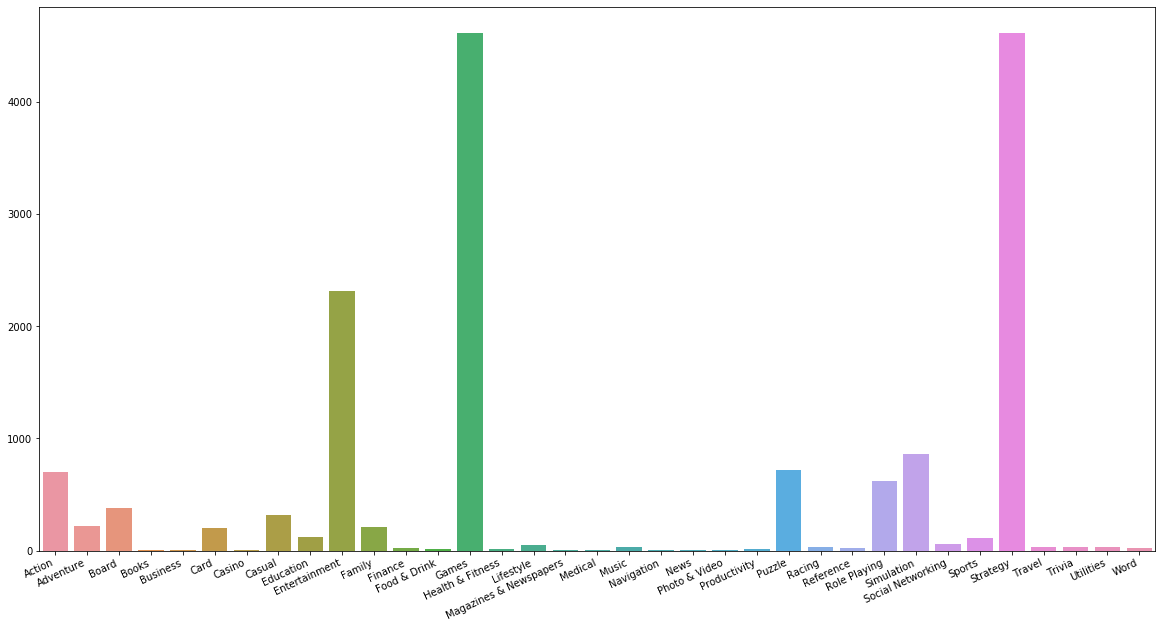

In [11]:
categories = list(expandedLabels.columns.values)
plt.figure(figsize=(20,10))
f = sns.barplot(categories, expandedLabels.sum().values)
f.set_xticklabels(f.get_xticklabels(), rotation='25', ha="right");

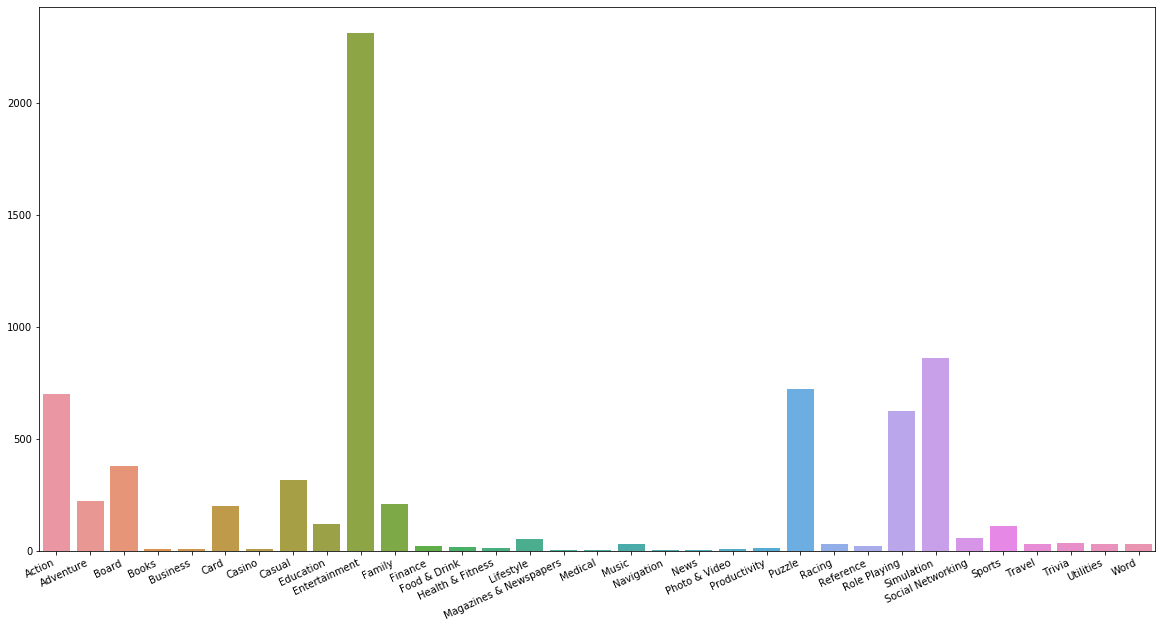

In [12]:
expanded_labels_minus_games_strategy = expandedLabels.drop(["Strategy", "Games"], axis=1)
categories = list(expanded_labels_minus_games_strategy.columns.values)
plt.figure(figsize=(20,10))
f = sns.barplot(categories, expanded_labels_minus_games_strategy.sum().values)
f.set_xticklabels(f.get_xticklabels(), rotation='25', ha="right");

In [13]:
print(filtered_data.shape)
print(expandedLabels.shape)
df = pd.concat([filtered_data.reset_index(drop=True),expandedLabels.reset_index(drop=True)], axis=1)
print(df.shape)
df.head()

(4618, 17)
(4618, 35)
(4618, 52)


,URL,ID,Name,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,...,Reference,Role Playing,Simulation,Social Networking,Sports,Strategy,Travel,Trivia,Utilities,Word
0,https://apps.apple.com/us/app/sudoku-classic-n...,286210009,Sudoku - Classic number puzzle,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.0,47.0,0.0,1.99,"Sudoku will tease your brain, challenge you or...",OutOfTheBit Ltd,...,0,0,0,0,0,1,0,0,0,0
1,https://apps.apple.com/us/app/awele-oware-manc...,289217958,Awele/Oware - Mancala HD,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.0,112.0,0.0,0.99,Awele/Oware is the oldest African board game a...,SOLILAB,...,0,0,0,0,0,1,0,0,0,0
2,https://apps.apple.com/us/app/awele-oware-manc...,289217958,Awele/Oware - Mancala HD,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.0,112.0,0.0,0.99,Awele/Oware is the oldest African board game a...,SOLILAB,...,0,0,0,0,0,1,0,0,0,0
3,https://apps.apple.com/us/app/catcha-mouse/id2...,290493286,Catcha Mouse,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,95971.0,0.0,"1.99, 0.99, 1.99, 0.99, 4.99, 1.99, 1.99",*More than 4 Million downloads!!!\n\n#1 iPhone...,"Meme, Inc",...,0,0,0,0,0,1,0,0,0,0
4,https://apps.apple.com/us/app/cool-sudoku-jigs...,290614255,"Cool Sudoku, Jigsaw, Killer",https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.5,357.0,0.0,"0.99, 0.99, 0.99","You can now play Sudoku, Killer Sudoku, Jigsaw...",Splash Software Ltd.,...,0,0,0,0,0,1,0,0,0,0


In [14]:
df = df.drop(['URL', 'ID', 'Icon URL'], axis=1)
df.head()

,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,...,Reference,Role Playing,Simulation,Social Networking,Sports,Strategy,Travel,Trivia,Utilities,Word
0,Sudoku - Classic number puzzle,3.0,47.0,0.0,1.99,"Sudoku will tease your brain, challenge you or...",OutOfTheBit Ltd,4+,EN,48672768.0,...,0,0,0,0,0,1,0,0,0,0
1,Awele/Oware - Mancala HD,3.0,112.0,0.0,0.99,Awele/Oware is the oldest African board game a...,SOLILAB,4+,"EN, FR, DE, IT, ES",122826752.0,...,0,0,0,0,0,1,0,0,0,0
2,Awele/Oware - Mancala HD,3.0,112.0,0.0,0.99,Awele/Oware is the oldest African board game a...,SOLILAB,4+,"EN, FR, DE, IT, ES",122826752.0,...,0,0,0,0,0,1,0,0,0,0
3,Catcha Mouse,3.5,95971.0,0.0,"1.99, 0.99, 1.99, 0.99, 4.99, 1.99, 1.99",*More than 4 Million downloads!!!\n\n#1 iPhone...,"Meme, Inc",4+,EN,26820692.0,...,0,0,0,0,0,1,0,0,0,0
4,"Cool Sudoku, Jigsaw, Killer",3.5,357.0,0.0,"0.99, 0.99, 0.99","You can now play Sudoku, Killer Sudoku, Jigsaw...",Splash Software Ltd.,4+,EN,52236288.0,...,0,0,0,0,0,1,0,0,0,0


In [15]:
df['In-app Purchases'].value_counts()

0.99                                                                                       390
1.99                                                                                       249
2.99                                                                                       205
0.99, 0.99                                                                                  73
4.99                                                                                        68
0.99, 0.99, 0.99                                                                            37
3.99                                                                                        32
1.99, 0.99                                                                                  30
0.99, 1.99                                                                                  18
1.99, 1.99                                                                                  16
5.99                                              

In [16]:
mlb_inapp = MultiLabelBinarizer()
expandedLabelData = mlb_inapp.fit_transform(df['In-app Purchases'].str.split(', '))
labelClasses = mlb_inapp.classes_
print(labelClasses)

# Create a pandas.DataFrame from our output
expandedLabels = pd.DataFrame(expandedLabelData, columns=labelClasses)
expandedLabels.head()

['0' '0.0' '0.99' '1.49' '1.99' '10.99' '109.99' '11.99' '119.99' '12.99'
 '129.99' '13.99' '139.99' '14.99' '15.99' '16.99' '169.99' '17.99'
 '18.99' '19.49' '19.99' '199.99' '2.49' '2.99' '20.99' '21.99' '22.99'
 '23.49' '23.99' '24.99' '25.99' '26.99' '27.99' '28.99' '29.99' '3.49'
 '3.99' '30.99' '31.99' '32.99' '33.99' '34.99' '35.99' '36.99' '37.99'
 '38.99' '39.99' '4.49' '4.99' '40.99' '41.99' '43.99' '44.99' '45.99'
 '46.99' '47.99' '48.99' '49.99' '5.49' '5.99' '54.99' '59.99' '6.99'
 '64.99' '69.99' '7.49' '7.99' '74.99' '79.99' '8.49' '8.99' '84.99'
 '89.99' '9.49' '9.99' '94.99' '99.99']


,0,0.0,0.99,1.49,1.99,10.99,109.99,11.99,119.99,12.99,...,74.99,79.99,8.49,8.99,84.99,89.99,9.49,9.99,94.99,99.99
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


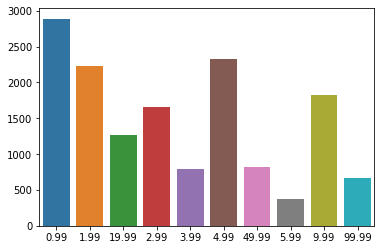

In [17]:
max_10_prices = expandedLabels.sum().sort_values(ascending=False)[:10]
sns.barplot(max_10_prices.index, max_10_prices.values)

In [18]:
df = pd.concat([df.reset_index(drop=True),expandedLabels.reset_index(drop=True)], axis=1)

In [19]:
y = df['Average User Rating']

In [20]:
desc = df['Description']
desc_lengths = [len(de) for de in desc]
df['desc_lengths'] = desc_lengths

In [21]:
df = df.drop(['Name', 'Average User Rating', 'In-app Purchases', 'Languages', 'Genres', 'Description'], axis=1)
df.head()

,User Rating Count,Price,Developer,Age Rating,Size,Primary Genre,Original Release Date,Current Version Release Date,Action,Adventure,...,79.99,8.49,8.99,84.99,89.99,9.49,9.99,94.99,99.99,desc_lengths
0,47.0,0.0,OutOfTheBit Ltd,4+,48672768.0,Games,30/07/2008,29/04/2019,0,0,...,0,0,0,0,0,0,0,0,0,2255
1,112.0,0.0,SOLILAB,4+,122826752.0,Games,31/08/2008,6/04/2015,0,0,...,0,0,0,0,0,0,0,0,0,618
2,112.0,0.0,SOLILAB,4+,122826752.0,Games,31/08/2008,6/04/2015,0,0,...,0,0,0,0,0,0,0,0,0,618
3,95971.0,0.0,"Meme, Inc",4+,26820692.0,Games,19/02/2009,26/04/2013,0,0,...,0,0,0,0,0,0,0,0,0,794
4,357.0,0.0,Splash Software Ltd.,4+,52236288.0,Games,24/09/2008,26/04/2019,0,0,...,0,0,0,0,0,0,0,0,0,1039


In [22]:
from datetime import datetime
date_format = "%d/%m/%Y"
(datetime.strptime(df['Current Version Release Date'][1], date_format) - datetime.strptime(df['Original Release Date'][1], date_format)).days

2409

In [23]:
dataset_date = datetime.strptime("3/7/2019", date_format)
dataset_date

datetime.datetime(2019, 7, 3, 0, 0)

In [24]:
curr_minus_orig = []

for i in range(len(df)):
    curr = df['Current Version Release Date'][i]
    orig = df['Original Release Date'][i]
    diff = datetime.strptime(curr, date_format) - datetime.strptime(orig, date_format)
    curr_minus_orig.append(diff.days)
    

df['Current minus Original'] = np.array(curr_minus_orig)
df['Original Release Date'] = np.array([ (dataset_date - datetime.strptime(date, date_format)).days for date in df['Original Release Date']])
df['Current Version Release Date'] =  np.array([ (dataset_date - datetime.strptime(date, date_format)).days for date in df['Current Version Release Date']])

In [25]:
df.dtypes[df.dtypes == object]

Developer        object
Age Rating       object
Primary Genre    object
dtype: object

In [26]:
df['Age Rating'].unique()

array(['4+', '9+', '12+', '17+'], dtype=object)

In [27]:
from sklearn import preprocessing
# Label Encoding
for f in df.columns:
    if df[f].dtype=='object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(df[f].values))
        df[f] = lbl.transform(list(df[f].values))

In [28]:
df['Age Rating'].unique()

array([2, 3, 0, 1], dtype=int64)

In [29]:
df['Age Rating'][df['Age Rating'] == 2] = 4
df['Age Rating'][df['Age Rating'] == 3] = 9
df['Age Rating'][df['Age Rating'] == 0] = 12
df['Age Rating'][df['Age Rating'] == 1] = 17

c:\users\nikunjgoel\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\nikunjgoel\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\nikunjgoel\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

In [30]:
df['Age Rating'].unique()

array([ 4,  9, 12, 17], dtype=int64)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=123)

In [32]:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [33]:
X_train.shape

(3694, 122)

In [34]:
X_train.head()

,User Rating Count,Price,Developer,Age Rating,Size,Primary Genre,Original Release Date,Current Version Release Date,Action,Adventure,...,8.49,8.99,84.99,89.99,9.49,9.99,94.99,99.99,desc_lengths,Current minus Original
1298,33.0,0.0,520,9,2.470707e+07,5,1841,1841,1,0,...,0,0,0,0,0,0,0,0,296,0
4431,312.0,0.0,2282,4,1.233213e+08,5,203,-14,0,0,...,0,0,0,0,0,0,0,0,835,217
3013,648.0,0.0,797,12,1.866854e+09,5,-30,-30,0,0,...,0,0,0,0,0,1,0,1,1955,0
3145,225.0,0.0,1572,9,1.555405e+08,5,931,817,0,0,...,0,0,0,0,0,1,0,0,1373,114
1067,15.0,0.0,2419,17,9.589965e+08,5,2044,2035,1,0,...,0,0,0,0,0,1,0,0,2138,9


In [35]:
X_test.head()

,User Rating Count,Price,Developer,Age Rating,Size,Primary Genre,Original Release Date,Current Version Release Date,Action,Adventure,...,8.49,8.99,84.99,89.99,9.49,9.99,94.99,99.99,desc_lengths,Current minus Original
3194,23.0,0.00,2451,9,1.001953e+08,5,847,705,0,0,...,0,0,0,0,0,1,0,1,1369,142
3209,7.0,0.00,1963,9,1.527184e+09,5,936,936,0,0,...,0,0,0,0,0,1,0,0,2846,0
948,1363.0,2.99,890,4,7.288422e+07,5,2120,769,0,0,...,0,0,0,0,0,0,0,0,987,1351
1843,687.0,0.00,658,12,9.701683e+07,5,1426,41,0,0,...,0,0,0,0,0,1,0,1,719,1385
1353,6.0,0.00,1535,4,6.935347e+07,5,1991,1991,0,0,...,0,0,0,0,0,0,0,0,430,0


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

X_train_preprocessed = preprocessing.normalize(X_train)
X_test_preprocessed = preprocessing.normalize(X_test)

lin_model = LinearRegression()

In [37]:
lin_model.fit(X_train_preprocessed, y_train)

y_train_predict = lin_model.predict(X_train_preprocessed)

In [38]:
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 0.6298926023435905




In [39]:
y_test_predict = lin_model.predict(X_test_preprocessed)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))

The model performance for testing set
--------------------------------------
RMSE is 0.6880589084753209


In [40]:
error_frame = pd.DataFrame({'Actual': np.array(y_test).flatten(), 'Predicted': y_test_predict.flatten()})
error_frame.head(10)

,Actual,Predicted
0,4.5,4.136567
1,3.0,4.189650
2,4.5,4.239712
3,4.0,4.148573
4,3.0,4.069042
5,3.0,4.237414
6,4.5,4.399898
7,4.0,4.279491
8,4.5,3.832580
9,5.0,4.167747


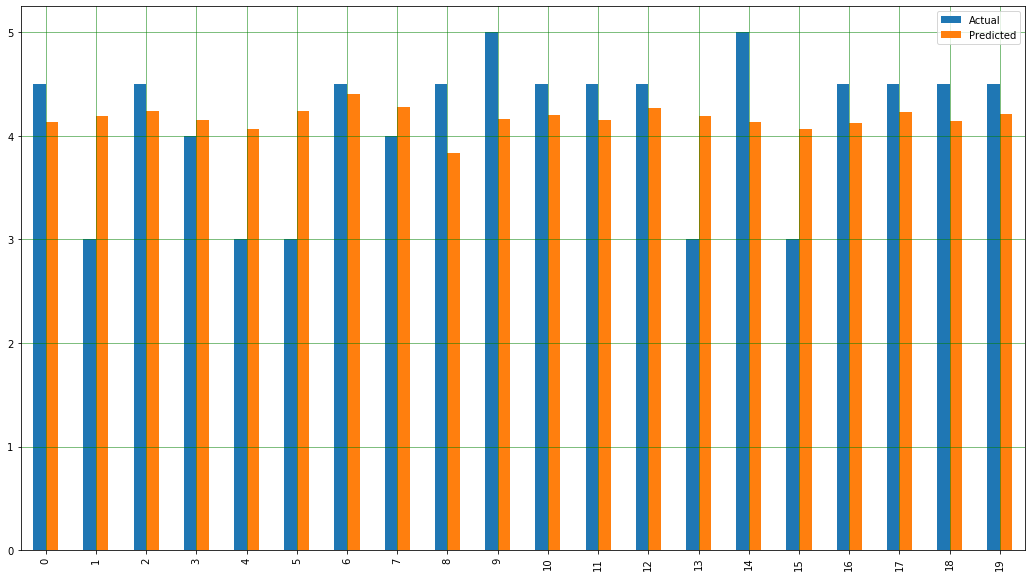

In [42]:
df1 = error_frame[0:20]
df1.plot(kind='bar',figsize=(18,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## XGboost

In [43]:
import xgboost as xgb

xgr = xgb.XGBRegressor(           
                 learning_rate=0.05,
                 max_depth=8,
                 min_child_weight=1.5,
                 n_estimators=500,                                                                    
                 seed=42,
                 num_boost_rounds=50,
                 objective="reg:squarederror",
                 #tree_method='gpu_hist',
                n_jobs=1
                )
xgr.fit(X_train, y_train)

c:\users\nikunjgoel\appdata\local\programs\python\python36\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=8, min_child_weight=1.5, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, num_boost_rounds=50,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=42, silent=None,
             subsample=1, verbosity=1)

In [44]:
train_pred = xgr.predict(data= X_train)
test_pred = xgr.predict(data= X_test)

mse_train = mean_squared_error(y_train, train_pred)
mse_test = mean_squared_error(y_test, test_pred)

print('RMSE train : {:.3f}'.format(np.sqrt(mse_train)))
print('RMSE test : {:.3f}'.format(np.sqrt(mse_test)))

RMSE train : 0.140
RMSE test : 0.617


In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'learning_rate': [0.01, 0.03, 0.06],
          'max_depth' : [4, 6, 8],
          'n_estimators' : [250, 500, 1000, 1500, 2000],
          'num_boost_rounds' : [5, 20],}

In [ ]:
%%time
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

xgr_optimized = xgb.XGBRegressor(objective="reg:squarederror",
                                 min_child_weight=1.5,n_jobs=1)

grid = GridSearchCV(estimator=xgr_optimized, scoring="neg_mean_squared_error", param_grid = params, verbose=1, cv=3)
grid.fit(X_train, y_train)

In [45]:
xgr_best = xgb.XGBRegressor(learning_rate = 0.03, max_depth  = 4, n_estimators =  250, num_boost_rounds =  5,  min_child_weight=1.5)

xgr_best.fit(X_train, y_train)

c:\users\nikunjgoel\appdata\local\programs\python\python36\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:03:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.03, max_delta_step=0,
             max_depth=4, min_child_weight=1.5, missing=None, n_estimators=250,
             n_jobs=1, nthread=None, num_boost_rounds=5, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [46]:
train_pred = xgr_best.predict(data= X_train)
test_pred = xgr_best.predict(data= X_test)

mse_train = mean_squared_error(y_train, train_pred)
mse_test = mean_squared_error(y_test, test_pred)

print('RMSE train : {:.3f}'.format(np.sqrt(mse_train)))
print('RMSE test : {:.3f}'.format(np.sqrt(mse_test)))

RMSE train : 0.497
RMSE test : 0.624


In [47]:
xgr_best = xgb.XGBRegressor(learning_rate = 0.01,
                            max_depth  = 6,
                            n_estimators =  500,
                            num_boost_rounds =  5,
                            min_child_weight=1.5)

xgr_best.fit(X_train, y_train)

c:\users\nikunjgoel\appdata\local\programs\python\python36\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:05:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=6, min_child_weight=1.5, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, num_boost_rounds=5, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [48]:
train_pred = xgr_best.predict(data= X_train)
test_pred = xgr_best.predict(data= X_test)

mse_train = mean_squared_error(y_train, train_pred)
mse_test = mean_squared_error(y_test, test_pred)

print('RMSE train : {:.3f}'.format(np.sqrt(mse_train)))
print('RMSE test : {:.3f}'.format(np.sqrt(mse_test)))

RMSE train : 0.436
RMSE test : 0.613


In [49]:
error_frame = pd.DataFrame({'Actual': np.array(y_test).flatten(), 'Predicted': test_pred.flatten()})
error_frame.head(10)

,Actual,Predicted
0,4.5,4.079388
1,3.0,3.776348
2,4.5,4.536380
3,4.0,4.142961
4,3.0,3.708147
5,3.0,4.374115
6,4.5,4.188713
7,4.0,4.247908
8,4.5,4.463861
9,5.0,4.254844


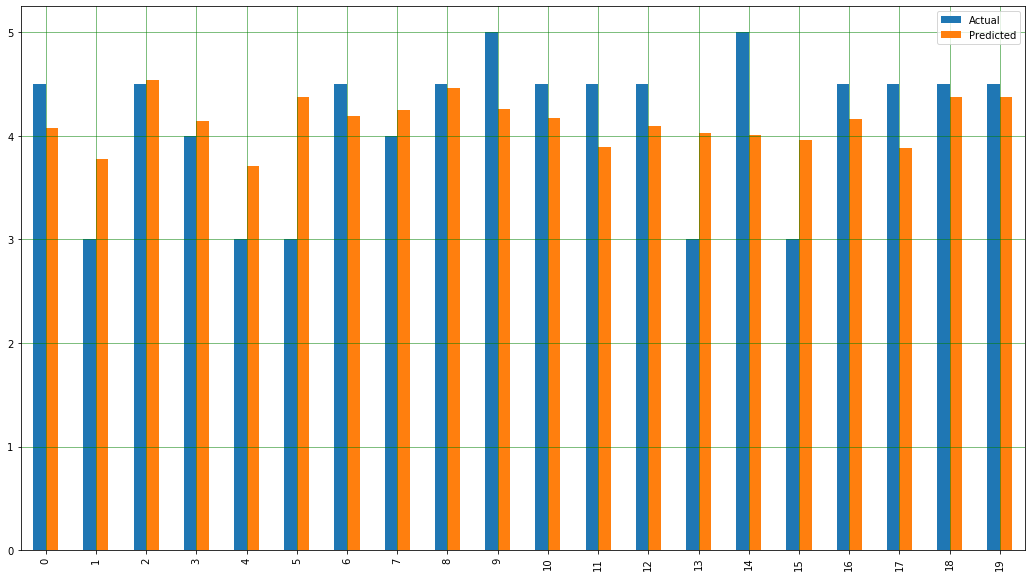

In [52]:
df1 = error_frame[:20]
df1.plot(kind='bar',figsize=(18,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

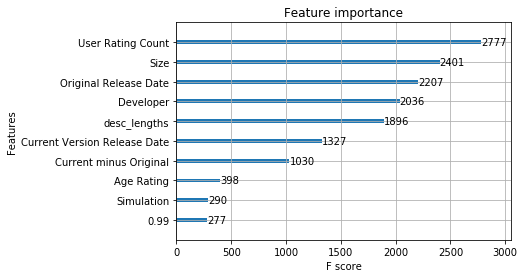

<Figure size 1080x1800 with 0 Axes>

In [51]:
ax = xgb.plot_importance(xgr_best, max_num_features=10)
plt.figure(figsize=(15,25))
plt.show()

In [ ]:
import h2o
from h2o.automl import H2OAutoML
h2o.init(max_mem_size='11G')

In [ ]:
X_train['target'] = y_train
h2o_train = h2o.H2OFrame(X_train)

X_test['target'] = y_test
h2o_test = h2o.H2OFrame(X_test)

In [ ]:
h2o_train.head()

In [ ]:
aml = H2OAutoML(max_runtime_secs=1200, seed=1)
aml.train(x=list(X_train.columns), y="target", training_frame=h2o_train, validation_frame=h2o_test)

In [ ]:
lb = aml.leaderboard
lb.head()

In [ ]:
aml.predict(h2o_test)

In [ ]:
train_pred = aml.predict(h2o_train)
test_pred = aml.predict(h2o_test)

In [ ]:
type(test_pred)

In [ ]:
#test_pred = test_pred.as_data_frame(use_pandas = True)
mse_test = mean_squared_error(y_test, test_pred)
mse_test

In [ ]:
test_pred.values.flatten()

In [ ]:
error_frame = pd.DataFrame({'Actual': np.array(y_test).flatten(), 'Predicted': test_pred.values.flatten()})
error_frame.head(10)

In [ ]:
df1 = error_frame[:20]
df1.plot(kind='bar',figsize=(24,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
train_pred

In [ ]:
test_pred

In [ ]:
y_train